In [1]:
import sys
sys.path.append('..')
sys.path.append('../..')

from stats import *
from sentiment_stats import *

from peewee import SQL
from database.models import RawFacebookComments, RawTwitterComments, RawInstagramComments, RawYouTubeComments, RawHashtagComments

rede_social = 'Facebook'
modelo = RawFacebookComments

cores = ['#FFA726', '#66BB6A', '#42A5F5', '#FFEE58', '#EF5350', '#AB47BC', '#C8C8C8']
cores2 = ['#FFA726', '#AB47BC', '#FFEE58', '#C8C8C8', '#EF5350', '#66BB6A', '#42A5F5']
cores_val = ['#EF5350', '#C8C8C8', '#66BB6A']
cores_val2 = ['#66BB6A', '#EF5350', '#C8C8C8']
sentimentos = ['ALEGRIA', 'SURPRESA', 'TRISTEZA', 'MEDO', 'RAIVA', 'DESGOSTO', 'NEUTRO']
valencia = ['POSITIVO', 'NEGATIVO', 'NEUTRO']

valencia_dict = OrderedDict()
for val in valencia:
    valencia_dict[val] = 0

sentimentos_dict = OrderedDict()
for sentimento in sentimentos:
    sentimentos_dict[sentimento] = 0
    
default_clause = [
    SQL('length(clean_comment) > 0'),
]

positivo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO"')
]

negativo_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO"')
]

neutro_clause = [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL('emotion in ("NEUTRO") AND valence = "NEUTRO"')
]

general = default_clause + [
    SQL('length(emotion) > 0 AND length(valence) > 0'),
    SQL("""
        (emotion in ("ALEGRIA", "SURPRESA") AND valence = "POSITIVO") 
        OR 
        (emotion in ("TRISTEZA", "RAIVA", "MEDO", "DESGOSTO") AND valence = "NEGATIVO")
        OR
        (emotion in ("NEUTRO") AND valence = "NEUTRO")
    """)
]

### Emoções gerais dos comentários : Facebook

In [2]:
total_comentarios = modelo.select() \
        .where(default_clause) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general)) \
        .order_by(modelo.timestamp)

In [3]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Facebook:
--------------------
Total de Comentários  : 67025
Comentários Positivos : 15322
Comentários Negativos : 13742
Comentários Neutros   : 1418

Porcentagem de comentários:
--------------------
Comentários Positivos : 22.86%
Comentários Negativos : 20.5%
Comentários Neutros   : 2.12%
Total                 : 45.48%


#### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,15322,13742,1418


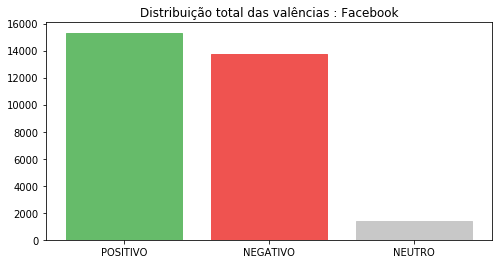

In [4]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

#### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,15203,119,12785,13,62,882,1418


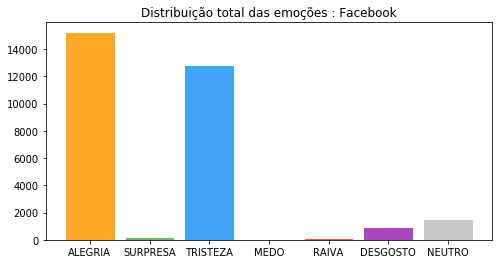

In [5]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

#### Comentários por data : Valência

,16/08/2018,17/08/2018,18/08/2018,19/08/2018,20/08/2018,21/08/2018,22/08/2018,23/08/2018
NEGATIVO,22,3,1,6,7,11,89,272
NEUTRO,1,0,1,0,0,1,6,13
POSITIVO,24,9,2,4,4,11,175,411


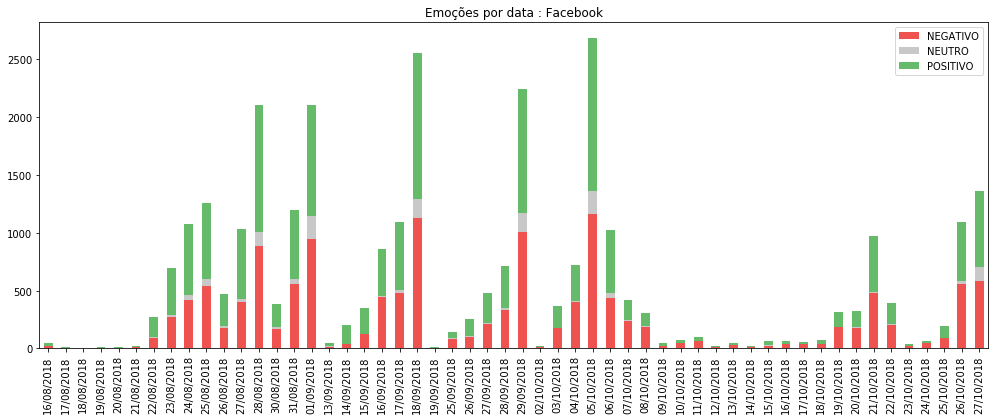

In [6]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

#### Comentários por data : Emoções

,16/08/2018,17/08/2018,18/08/2018,19/08/2018,20/08/2018,21/08/2018,22/08/2018,23/08/2018
ALEGRIA,24,9,2,4,4,11,174,409
DESGOSTO,0,0,0,0,1,1,6,22
MEDO,0,0,0,0,0,0,0,0
NEUTRO,1,0,1,0,0,1,6,13
RAIVA,1,0,0,0,0,0,0,2
SURPRESA,0,0,0,0,0,0,1,2
TRISTEZA,21,3,1,6,6,10,83,248


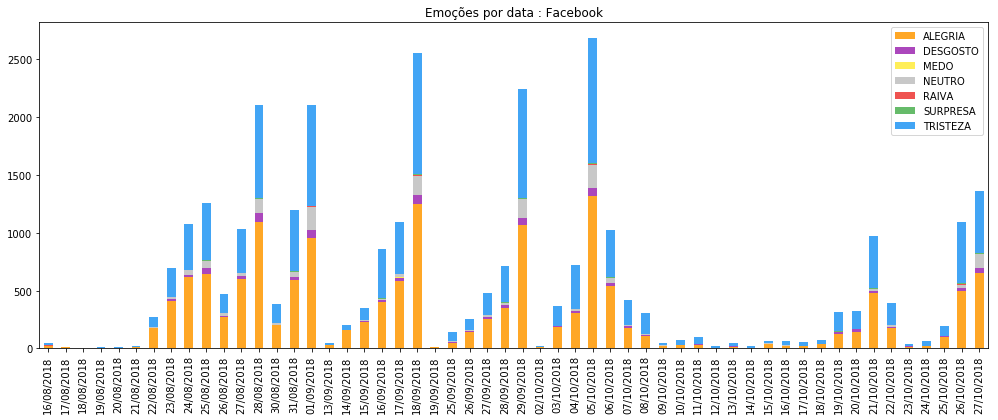

In [7]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

### Emoções por candidato : Facebook

#### Jair Bolsonaro

In [8]:
candidato_c = [modelo.candidate == 'Jair Bolsonaro']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [9]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Facebook:
--------------------
Total de Comentários  : 16238
Comentários Positivos : 4175
Comentários Negativos : 3341
Comentários Neutros   : 44

Porcentagem de comentários:
--------------------
Comentários Positivos : 25.71%
Comentários Negativos : 20.58%
Comentários Neutros   : 0.27%
Total                 : 46.56%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,4175,3341,44


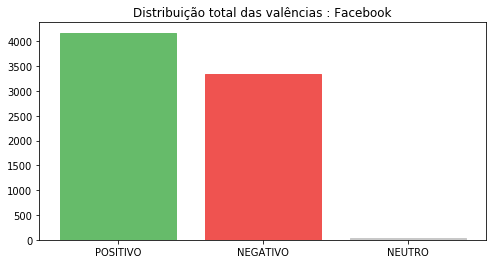

In [10]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,4156,19,3120,4,11,206,44


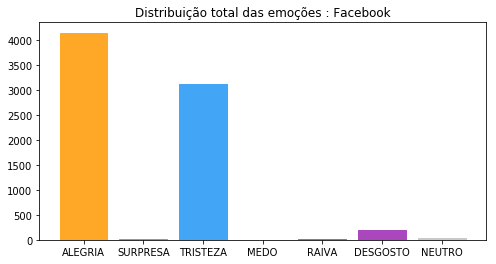

In [11]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018,30/08/2018
NEGATIVO,0,72,98,171,20,49,343,57
NEUTRO,0,1,0,0,1,0,6,0
POSITIVO,1,61,151,193,15,74,470,57


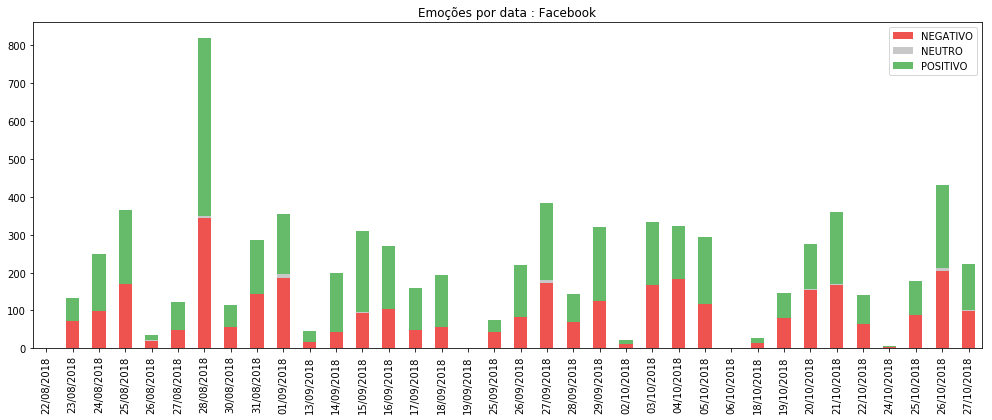

In [12]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018,30/08/2018
ALEGRIA,1,60,151,188,15,74,467,57
DESGOSTO,0,5,3,12,0,1,23,2
MEDO,0,0,1,0,0,0,0,0
NEUTRO,0,1,0,0,1,0,6,0
RAIVA,0,0,0,0,0,0,3,0
SURPRESA,0,1,0,5,0,0,3,0
TRISTEZA,0,67,94,159,20,48,317,55


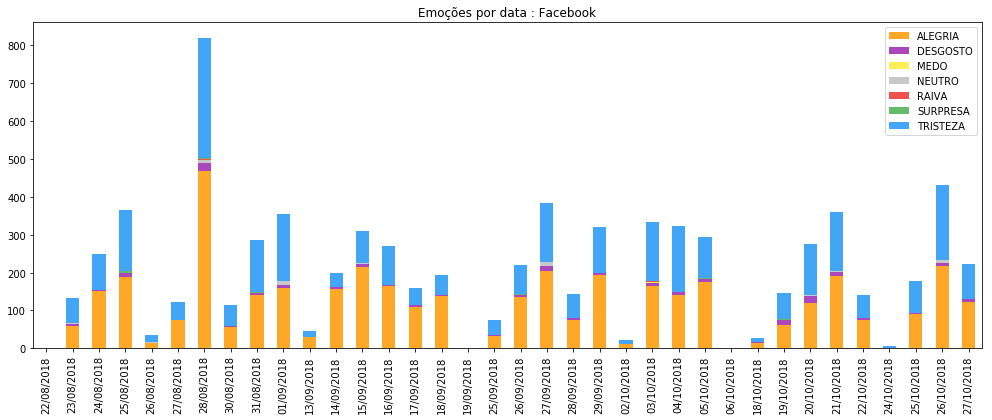

In [13]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Fernando Haddad

In [14]:
candidato_c = [modelo.candidate == 'Fernando Haddad']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [15]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Facebook:
--------------------
Total de Comentários  : 13688
Comentários Positivos : 2594
Comentários Negativos : 2604
Comentários Neutros   : 920

Porcentagem de comentários:
--------------------
Comentários Positivos : 18.95%
Comentários Negativos : 19.02%
Comentários Neutros   : 6.72%
Total                 : 44.7%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,2594,2604,920


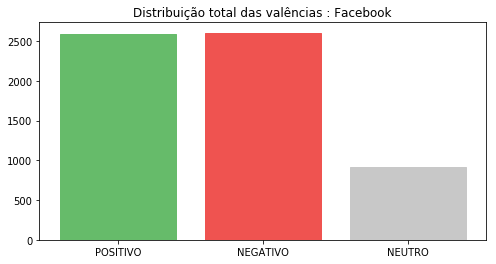

In [16]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,2561,33,2446,1,9,148,920


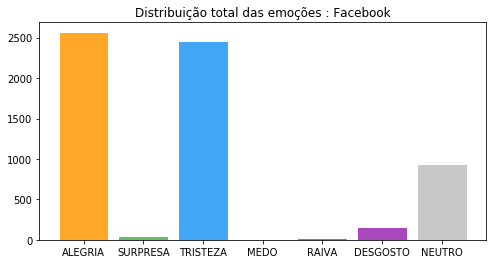

In [17]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018,31/08/2018,01/09/2018
NEGATIVO,2,95,118,13,29,191,37,172
NEUTRO,1,23,50,1,5,79,16,147
POSITIVO,1,107,121,13,43,158,41,113


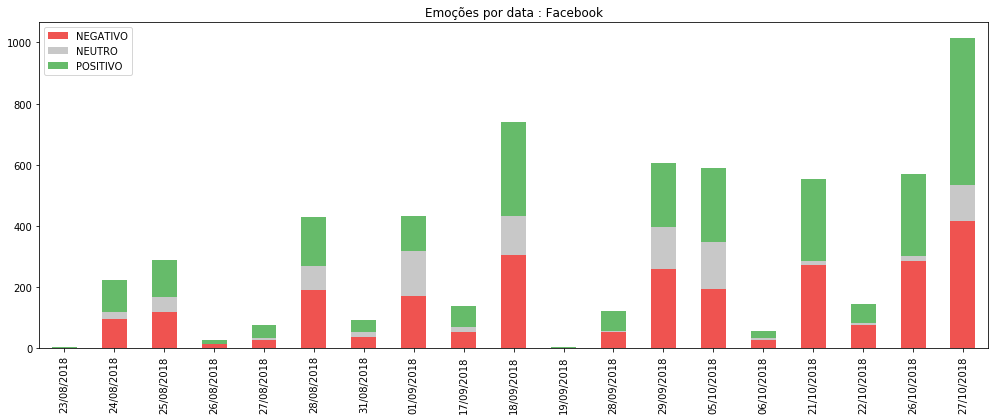

In [18]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018,31/08/2018,01/09/2018
ALEGRIA,1,107,120,12,43,158,40,112
DESGOSTO,0,4,13,2,0,23,1,8
MEDO,0,0,0,0,0,0,0,0
NEUTRO,1,23,50,1,5,79,16,147
RAIVA,0,0,0,0,1,0,0,0
SURPRESA,0,0,1,1,0,0,1,1
TRISTEZA,2,91,105,11,28,168,36,164


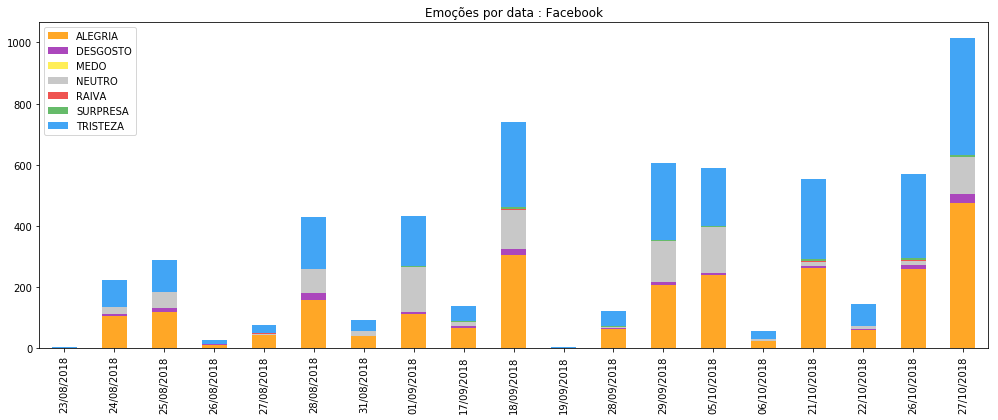

In [19]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Ciro Gomes

In [20]:
candidato_c = [modelo.candidate == 'Ciro Gomes']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [21]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Facebook:
--------------------
Total de Comentários  : 14206
Comentários Positivos : 4204
Comentários Negativos : 2768
Comentários Neutros   : 128

Porcentagem de comentários:
--------------------
Comentários Positivos : 29.59%
Comentários Negativos : 19.48%
Comentários Neutros   : 0.9%
Total                 : 49.98%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,4204,2768,128


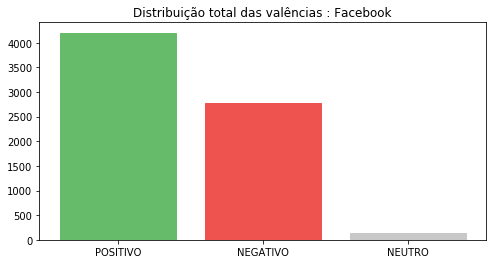

In [22]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,4177,27,2561,2,17,188,128


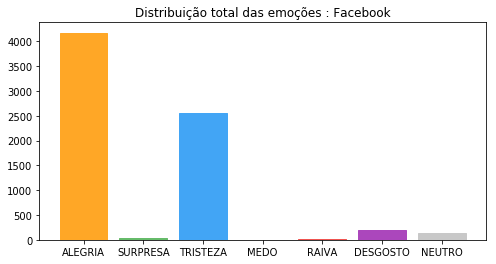

In [23]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,16/08/2018,17/08/2018,18/08/2018,19/08/2018,20/08/2018,21/08/2018,22/08/2018,23/08/2018
NEGATIVO,22,3,1,4,6,3,42,58
NEUTRO,1,0,1,0,0,0,1,2
POSITIVO,24,9,2,3,2,2,77,147


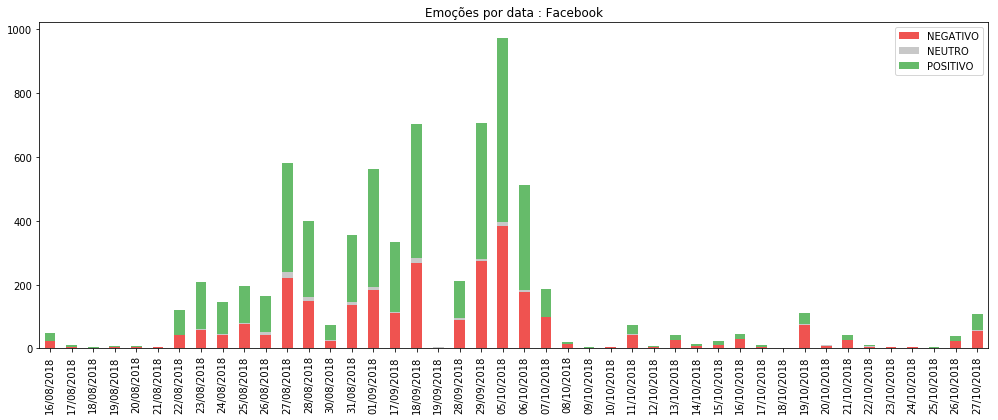

In [24]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,16/08/2018,17/08/2018,18/08/2018,19/08/2018,20/08/2018,21/08/2018,22/08/2018,23/08/2018
ALEGRIA,24,9,2,3,2,2,76,146
DESGOSTO,0,0,0,0,0,0,2,5
MEDO,0,0,0,0,0,0,0,0
NEUTRO,1,0,1,0,0,0,1,2
RAIVA,1,0,0,0,0,0,0,0
SURPRESA,0,0,0,0,0,0,1,1
TRISTEZA,21,3,1,4,6,3,40,53


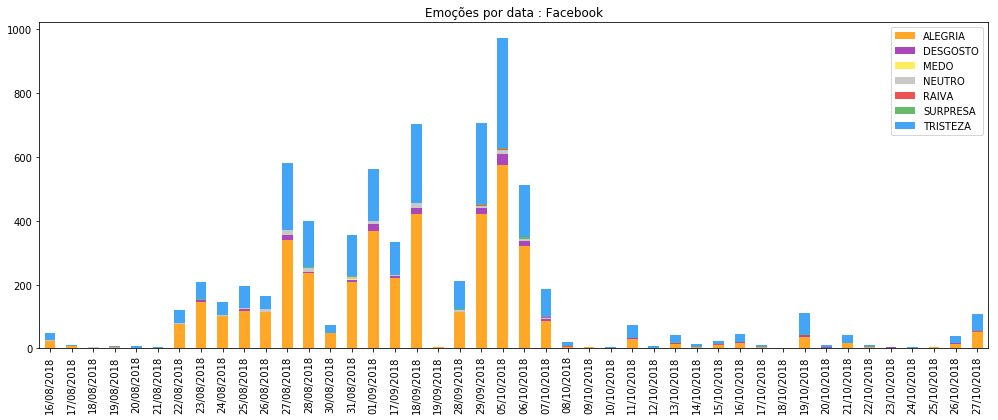

In [26]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Geraldo Alckmin

In [27]:
candidato_c = [modelo.candidate == 'Geraldo Alckmin']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [28]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Facebook:
--------------------
Total de Comentários  : 12204
Comentários Positivos : 2349
Comentários Negativos : 2538
Comentários Neutros   : 190

Porcentagem de comentários:
--------------------
Comentários Positivos : 19.25%
Comentários Negativos : 20.8%
Comentários Neutros   : 1.56%
Total                 : 41.6%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,2349,2538,190


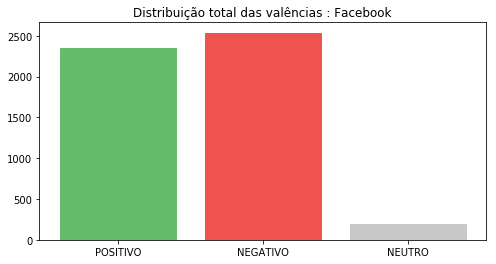

In [29]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,2331,18,2371,3,9,155,190


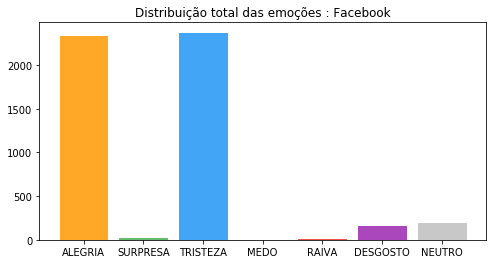

In [30]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,21/08/2018,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018
NEGATIVO,1,30,50,91,75,31,48,88
NEUTRO,0,4,2,7,9,8,3,11
POSITIVO,0,79,120,174,157,85,99,126


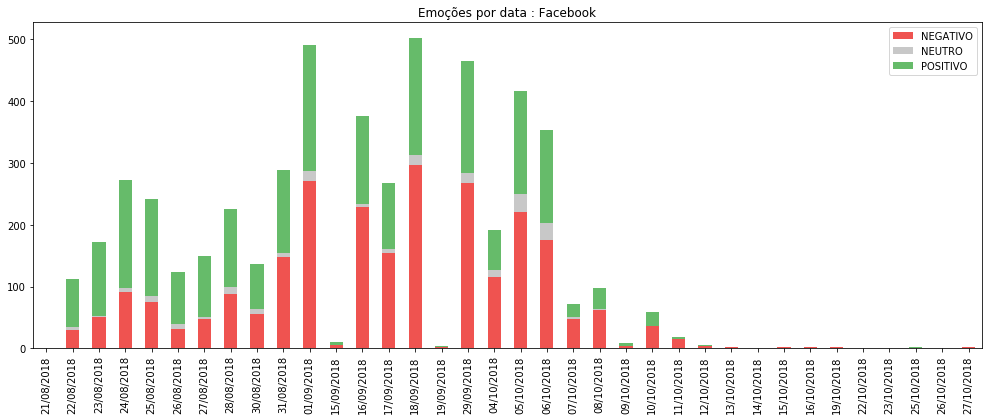

In [31]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,21/08/2018,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018,27/08/2018,28/08/2018
ALEGRIA,0,79,120,173,154,84,98,126
DESGOSTO,0,2,4,2,6,2,2,10
MEDO,0,0,0,0,0,0,0,0
NEUTRO,0,4,2,7,9,8,3,11
RAIVA,0,0,2,0,0,0,0,0
SURPRESA,0,0,0,1,3,1,1,0
TRISTEZA,1,28,44,89,69,29,46,78


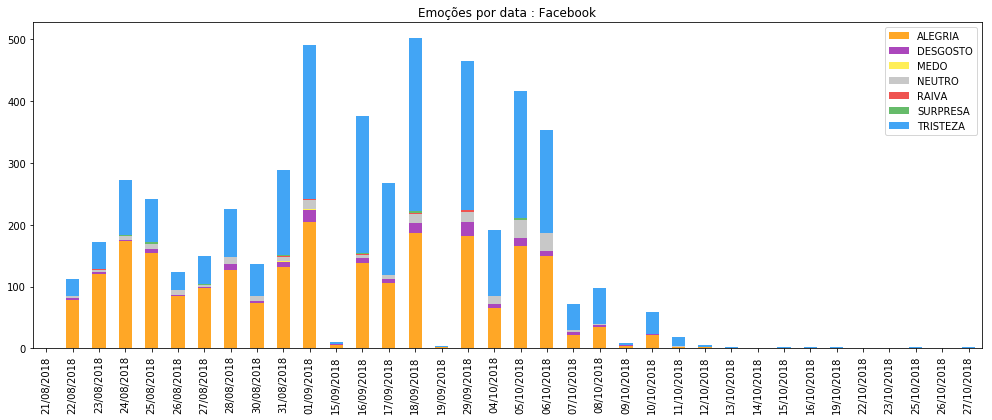

In [32]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)

#### Marina Silva

In [33]:
candidato_c = [modelo.candidate == 'Marina Silva']

total_comentarios = modelo.select() \
        .where(reduce(operator.and_, default_clause + candidato_c)) \
        .count()

comentarios_positivos = modelo.select() \
        .where(reduce(operator.and_, default_clause + positivo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_negativos = modelo.select() \
        .where(reduce(operator.and_, default_clause + negativo_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios_neutros = modelo.select() \
        .where(reduce(operator.and_, default_clause + neutro_clause + candidato_c)) \
        .order_by(modelo.timestamp)

comentarios = modelo.select() \
        .where(reduce(operator.and_, general + candidato_c)) \
        .order_by(modelo.timestamp)

In [34]:
alegria, surpresa, tristeza, medo, raiva, desgosto, positivo, negativo, neutro = load_emocoes_comentarios(comentarios_positivos, comentarios_negativos, comentarios_neutros)
print_statistics(rede_social, total_comentarios, comentarios_positivos, comentarios_negativos, comentarios_neutros)

Estatísticas do Facebook:
--------------------
Total de Comentários  : 10689
Comentários Positivos : 2000
Comentários Negativos : 2491
Comentários Neutros   : 136

Porcentagem de comentários:
--------------------
Comentários Positivos : 18.71%
Comentários Negativos : 23.3%
Comentários Neutros   : 1.27%
Total                 : 43.29%


##### Contagem total de comentários : Valência

,POSITIVO,NEGATIVO,NEUTRO
0,2000,2491,136


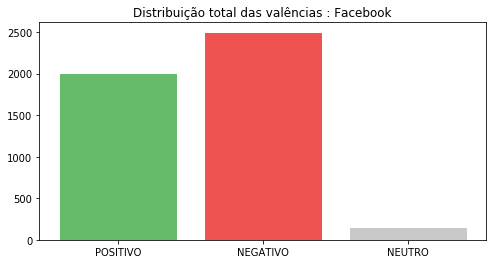

In [35]:
graph_valence_total(rede_social, cores_val2, valencia, positivo, negativo, neutro)

##### Contagem total de comentários : Emoções

,ALEGRIA,SURPRESA,TRISTEZA,MEDO,RAIVA,DESGOSTO,NEUTRO
0,1978,22,2287,3,16,185,136


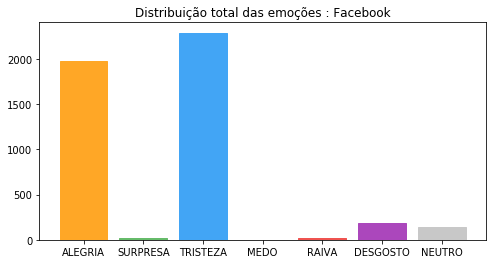

In [36]:
graph_sentimentos_total(rede_social, cores, sentimentos, alegria, surpresa, tristeza, medo, raiva, desgosto, neutro)

##### Comentários por data : Valência

,19/08/2018,20/08/2018,21/08/2018,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018
NEGATIVO,2,1,7,17,90,93,96,69
NEUTRO,0,0,1,1,7,8,2,3
POSITIVO,1,2,9,18,82,86,68,49


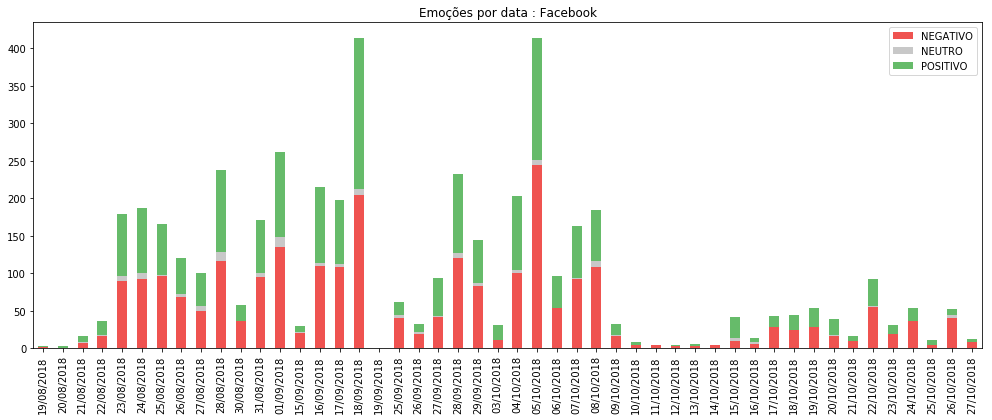

In [37]:
graph_valencia_por_data(rede_social, cores_val, valencia_dict, comentarios)

##### Comentários por data : Emoções

,19/08/2018,20/08/2018,21/08/2018,22/08/2018,23/08/2018,24/08/2018,25/08/2018,26/08/2018
ALEGRIA,1,2,9,18,82,86,68,48
DESGOSTO,0,1,1,2,8,8,8,5
MEDO,0,0,0,0,0,0,0,0
NEUTRO,0,0,1,1,7,8,2,3
RAIVA,0,0,0,0,0,0,0,1
SURPRESA,0,0,0,0,0,0,0,1
TRISTEZA,2,0,6,15,82,85,88,63


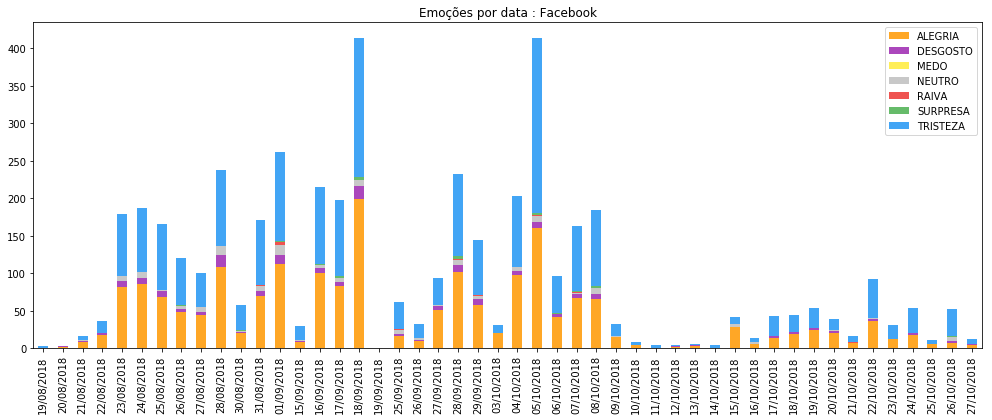

In [38]:
graph_emocoes_por_data(rede_social, cores2, sentimentos_dict, comentarios)